<center>

#  TFM GRUPO 5: Treatwell Churn Model

</center>

---

- Arnau Andrews Alés
- Bruno Pedemonte Vazquez
- Camila Silva Millones
- Oriol Masias Vegés

---
<center>
IL3-UB: Máster en Big Data & Data Science
</center>

## Objetivo

Desarrollar un **Modelo de Churn** para la empresa **Treatwell Spain SL** que permita identificar los factores que influyen en la cancelación de los salones después de utilizar los servicios de la plataforma.

## Justificación

Desarrollar un **Modelo de Churn** para la empresa **Treatwell Spain SL** que permita identificar los factores que influyen en la cancelación de los salones después de utilizar los servicios de la plataforma. Al conocer las razones detrás de la pérdida de salones, la empresa podrá implementar medidas preventivas para retener a los salones actuales y mejorar su satisfacción y experiencia en la plataforma.

Además, la implementación de este modelo también es crucial para optimizar las estrategias de **adquisición de salones** de Treatwell, ya que permite enfocarse en los salones con mayor probabilidad de permanecer en la plataforma por un período prolongado. Esto puede tener un impacto significativo en la **rentabilidad de la empresa**, ya que retener a los salones existentes resulta más económico que adquirir nuevos.

En conclusión, la creación de un Modelo de Churn permitirá a Treatwell **mejorar la satisfacción** de los salones, **retener a los salones** existentes, **atraer a nuevos salones** y, así, mejorar la **rentabilidad de la empresa**.

## Antecedentes

**Treatwell Spain SL**, es una empresa de servicios B2B especializada en la gestión de reservas y citas para salones de belleza. Como parte de su visión estratégica, la empresa busca **retener a los salones actuales** y mejorar su experiencia, y así, su satisfacción en la plataforma. Para ello, se ha solicitado el desarrollo de un **modelo de Churn** que permita identificar los factores que influyen en la cancelación de una suscripción y, de esta manera, tomar medidas preventivas.

Además, la implementación de este modelo también permitirá optimizar las estrategias de **adquisición de nuevos salones**. Al identificar los factores que influyen en la cancelación de una suscripción, podrán enfocarse en atraer a salones con mayor probabilidad de permanecer en la plataforma a largo plazo.

## 1.Importar librerías

In [ ]:
# Importamos las librerías
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2.Cargar datos

In [ ]:
# Cargamos el CSV de los Venues
df_raw_venues = pd.read_csv("/content/drive/Shareddrives/Data_TFM/venues_2023_22_21.csv", sep="	", decimal=".")

<ipython-input-2-d5c5036b6837>:2: DtypeWarning: Columns (21,25,32,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw_venues = pd.read_csv("/content/drive/Shareddrives/Data_TFM/venues_2023_22_21.csv", sep="	", decimal=".")


In [ ]:
# Cargamos el CSV de las Orders
df_raw_orders = pd.read_csv("/content/drive/Shareddrives/Data_TFM/orders_2023_22_21.csv", sep="	", decimal=".")

<ipython-input-4-272cc00e8aeb>:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw_orders = pd.read_csv("/content/drive/Shareddrives/Data_TFM/orders_2023_22_21.csv", sep="	", decimal=".")


In [ ]:
# Copiamos los CSV para mantener los datos intactos
df_venues = df_raw_venues.copy()

In [ ]:
df_orders = df_raw_orders.copy()

## 3.Visualizar los datos

In [ ]:
df_venues.head()

,date_day,unique_venue_id,created,venue_status,venue_active_from,original_marketplace_venue_type_name,country_code,tier,saas_product,first_live_date,...,plan_active_from,plan_active_to,prepay,prepaid_until_to,discount,plan_discount_end_date,bill_every,plan_name,plan_fee_eur,is_zero_commission_plan
0,2021-07-01,11000000016,2008-03-25 12:47:09,DISABLED,(null),Hotel Spa,GB,(null),tw_connect,2009-07-20 00:00:00,...,2021-04-14 13:31:29,2999-12-31 00:00:00,0,(null),0,(null),1,Entry,16.65,False
1,2021-08-01,11000000016,2008-03-25 12:47:09,DISABLED,(null),Hotel Spa,GB,(null),tw_connect,2009-07-20 00:00:00,...,2021-04-14 13:31:29,2999-12-31 00:00:00,0,(null),0,(null),1,Entry,16.65,False
2,2021-09-01,11000000016,2008-03-25 12:47:09,DISABLED,(null),Hotel Spa,GB,(null),tw_connect,2009-07-20 00:00:00,...,2021-04-14 13:31:29,2999-12-31 00:00:00,0,(null),0,(null),1,Entry,16.65,False
3,2021-10-01,11000000016,2008-03-25 12:47:09,DISABLED,(null),Hotel Spa,GB,(null),tw_connect,2009-07-20 00:00:00,...,2021-04-14 13:31:29,2999-12-31 00:00:00,0,(null),0,(null),1,Entry,16.65,False
4,2021-11-01,11000000016,2008-03-25 12:47:09,DISABLED,(null),Hotel Spa,GB,(null),tw_connect,2009-07-20 00:00:00,...,2021-04-14 13:31:29,2999-12-31 00:00:00,0,(null),0,(null),1,Entry,16.65,False


In [ ]:
df_venues.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4606923 entries, 0 to 4606922
Data columns (total 36 columns):
 #   Column                                Dtype 
---  ------                                ----- 
 0   date_day                              object
 1   unique_venue_id                       int64 
 2   created                               object
 3   venue_status                          object
 4   venue_active_from                     object
 5   original_marketplace_venue_type_name  object
 6   country_code                          object
 7   tier                                  object
 8   saas_product                          object
 9   first_live_date                       object
 10  latest_live_date                      object
 11  disabled_date                         object
 12  reactivated_status                    object
 13  is_twconnect_migrated                 bool  
 14  is_purchasable                        object
 15  is_widget_enabled               

In [ ]:
df_orders.head()

,unique_venue_id,year,month,content_channel_name,online_order_segment,payment_method_name,saas_product,gross_orders,gross_item_eur_amount_ttv,gross_aov,gross_revenue_eur,gross_take_rate,cancelled_orders,cancelled_item_eur_amount_ttv,cancelled_aov,cancelled_revenue_eur,cancelled_take_rate
0,12000021750,2022.0,11.0,Marketplace,4.Loyal,Pay at venue,tw_pro,4,120.00,30.000000,0.00,0.0,1,30.0,30.0,0.0,0.0
1,11000386404,2022.0,11.0,Marketplace,4.Loyal,Pay at venue,tw_connect,561,16025.01,28.565080,0.00,0.0,47,1298.0,27.617021276595743,0.0,0.0
2,11000380037,2022.0,11.0,Widget,4.Loyal,iDeal_intent,tw_connect,18,872.00,48.444444,17.44,0.02,2,113.0,56.5,2.26,0.019999999999999997
3,11000400421,2022.0,10.0,Marketplace,4.Loyal,PayPal,tw_connect,12,622.30,51.858333,12.46,0.020022497187851523,1,145.95,145.95,2.92,0.020006851661527922
4,11000329570,2022.0,11.0,Widget,4.Loyal,PayPal,tw_connect,2,116.24,58.120000,2.34,0.020130763936682727,(null),(null),(null),(null),(null)


In [ ]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5021752 entries, 0 to 5021751
Data columns (total 17 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   unique_venue_id                object 
 1   year                           float64
 2   month                          float64
 3   content_channel_name           object 
 4   online_order_segment           object 
 5   payment_method_name            object 
 6   saas_product                   object 
 7   gross_orders                   int64  
 8   gross_item_eur_amount_ttv      float64
 9   gross_aov                      float64
 10  gross_revenue_eur              float64
 11  gross_take_rate                object 
 12  cancelled_orders               object 
 13  cancelled_item_eur_amount_ttv  object 
 14  cancelled_aov                  object 
 15  cancelled_revenue_eur          object 
 16  cancelled_take_rate            object 
dtypes: float64(5), int64(1), object(11)
memory usa

## 4.Transformación inicial de datos

Podemos observar que existen valores **null** que no están en el formato **NaN**. El primer paso consistirá en convertirlos al formato adecuado en ambos datasets.

# ***## 4.Feature Engineering Venues***

- is_purchasable
- is_widget_enabled
- Churn

In [ ]:
# Transformamos los strings %null% en valores NaN
df_venues = df_venues.replace(to_replace=r'.*null.*', value=np.nan, regex=True)

In [ ]:
import pandas as pd

# Assuming 'df_venues' is the DataFrame
duplicated_count = df_venues.duplicated().sum()

print("Number of duplicated rows in the dataset:", duplicated_count)


Number of duplicated rows in the dataset: 0


In [ ]:
# Transformamos el "type" de las variables
df_venues["unique_venue_id"] = df_venues["unique_venue_id"].astype(str)
df_venues['date_day'] = pd.to_datetime(df_venues['date_day'])
df_venues['is_purchasable'] = df_venues['is_purchasable'].map({'true': True, 'false': False}).astype(bool)
df_venues['is_widget_enabled'] = df_venues['is_widget_enabled'].map({'true': True, 'false': False}).astype(bool)
df_venues['first_live_date'] = pd.to_datetime(df_venues['first_live_date'])

In [ ]:
mapping = {np.nan: 'NaN',
          'Entry':'Connect Agenda',
          'Plus':'Connect SaaS',
          'Partner Saas':'Partner Saas',
          'Premium': 'Premium',
          'Starter': 'Starter',
          'Advanced': 'Advanced',
          'Legacy':'Legacy',
          'Réservation En Ligne':'Starter',
          'Gr Funkmartini Basic':'Starter',
          'Gr Funkmartini Gold':'Advanced',
          'Vetrina + Agenda':'Starter',
          'Gestion + Réservation En Ligne':'Premium',
          'Global':'Premium',
          'Trial':'Trial',
          'Réservation En Ligne + Site Internet':'Advanced',
          'Fr Uala Marketplace':'Trial',
          'Gestion': 'Premium',
          'Site Internet Only':'Starter',
          'Uk Churned Venue':'Not Plan',
          'Gestion + Site Internet':'Premium',
          'Es Churned Venue':'Not Plan',
          'Fr Churned Venue':'Not Plan',
          'Costo Servizio Di Prenotazione':'Not Plan',
          'Gestionale':'Premium',
          'Es Free':'Trial',
          'De Churned Venue':'Not Plan',
          'Dead':'Not Plan',
          'It Churned Venue':'Not Plan',
          'Pt Basic':'Starter',
          'It Free':'Trial',
          'Saas Kadus':'Partner Saas',
          'Fr Uala Free':'Trial',
          'Comisiones':'Not Plan'
           }

# Create a new column 'billing_product_name' by mapping the product names
# Replace NaN values with a placeholder value
df_venues['plan_name ']= df_venues['plan_name'].replace(mapping)

# Value Counts
print('Número de registros:', df_venues.plan_name.value_counts().sum())
df_venues.plan_name.value_counts()

Número de registros: 4606923


NaN                        1912452
Connect Agenda             1594843
Connect SaaS                399135
Partner Saas                275391
Starter                     108550
Premium                     100312
Trial                        83727
Advanced                     73402
Legacy                       56811
Be Uala Marketplace           1368
Gr Uala Free                   389
Not Plan                       322
Fr Uala Marketplace Pro        163
Twpro Unlimited Plan            58
Name: plan_name, dtype: int64

In [ ]:
df_venues['is_zero_commission_plan'].isna().sum()

1912452

In [ ]:
# Drop duplicates
df_venues = df_venues.drop_duplicates()
# Drop duplicated with logic
duplicates = df_venues.duplicated(subset=['unique_venue_id', 'date_day'], keep=False)
mask = duplicates & (df_venues['plan_name'] == 'Partner Saas')
df_venues = df_venues[~mask]
# Drop duplicated with logic 2
duplicates_2 = df_venues.duplicated(subset=['unique_venue_id', 'date_day'], keep=False)
mask_2 = duplicates_2 & (df_venues['plan_name'] == 'Not Plan')
df_venues = df_venues[~mask_2]
# Drop duplicated with logic 3
duplicates_3 = df_venues.duplicated(subset=['unique_venue_id', 'date_day'], keep=False)
mask_3 = duplicates_3 & (df_venues['plan_name'] == 'Connect Agenda')
df_venues = df_venues[~mask_3]
# Drop duplicated with logic 4
duplicates_4 = df_venues.duplicated(subset=['unique_venue_id', 'date_day'], keep=False)
mask_4 = duplicates_4 & (df_venues['plan_name'] == 'Connect SaaS')
df_venues = df_venues[~mask_4]
# Drop duplicated with logic 5
duplicates_5 = df_venues.duplicated(subset=['unique_venue_id', 'date_day'], keep=False)
mask_5 = duplicates_5 & (df_venues['plan_name'] == 'Trial')
df_venues = df_venues[~mask_5]
# Drop Duplicated with logic 6
duplicates = df_venues.duplicated(subset=['unique_venue_id', 'date_day'], keep='first')
df_venues.drop(df_venues[duplicates].index, inplace=True)

In [ ]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020284 entries, 0 to 5021751
Data columns (total 17 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   unique_venue_id                object 
 1   year                           float64
 2   month                          float64
 3   content_channel_name           object 
 4   online_order_segment           object 
 5   payment_method_name            object 
 6   saas_product                   object 
 7   gross_orders                   int64  
 8   gross_item_eur_amount_ttv      float64
 9   gross_aov                      float64
 10  gross_revenue_eur              float64
 11  gross_take_rate                object 
 12  cancelled_orders               object 
 13  cancelled_item_eur_amount_ttv  object 
 14  cancelled_aov                  object 
 15  cancelled_revenue_eur          object 
 16  cancelled_take_rate            object 
dtypes: float64(5), int64(1), object(11)
memory usa

Ahora vamos a visualizar la cantidad de **valores NaN** que tiene cada variable.

In [ ]:
df_venues.isna().mean()*100

date_day                                 0.000000
unique_venue_id                          0.000000
created                                  0.000000
venue_status                            20.256599
venue_active_from                       95.541868
original_marketplace_venue_type_name     5.049504
country_code                             0.000000
tier                                    49.284473
saas_product                             0.000000
first_live_date                         23.203763
latest_live_date                        23.646109
disabled_date                           72.721078
reactivated_status                       0.000000
is_twconnect_migrated                    0.000000
is_purchasable                           0.000000
is_widget_enabled                        0.000000
is_heavy_saas                           23.745775
first_heavy_saas_date                   98.826614
active_employees                        86.904761
direct_appointments_l30d                23.745775


In [ ]:
df_orders.isna().mean()*100

unique_venue_id                   0.000000
year                              0.000000
month                             0.000000
content_channel_name              0.000000
online_order_segment              0.000000
payment_method_name               1.201048
saas_product                      0.000000
gross_orders                      0.000000
gross_item_eur_amount_ttv         0.000000
gross_aov                         0.000000
gross_revenue_eur                 0.000000
gross_take_rate                   1.242878
cancelled_orders                 64.859279
cancelled_item_eur_amount_ttv    64.859279
cancelled_aov                    64.859279
cancelled_revenue_eur            64.859279
cancelled_take_rate              64.881967
dtype: float64

Vamos a **descartar** las siguientes variables ya que tienen una alta cantidad de **valores NaN**:

- venue_active_from
- tier
- active_employees
- plan_active_from

In [ ]:
# Eliminar las variables con exceso de valores NaN
df_venues = df_venues.drop("venue_active_from", axis=1)
df_venues = df_venues.drop("tier", axis=1)
df_venues = df_venues.drop("active_employees", axis=1)
df_venues = df_venues.drop("plan_active_from", axis=1)

In [ ]:
from scipy.stats import pointbiserialr

# Drop rows with missing values in the specified columns
df_clean = df_venues.dropna(subset=['plan_fee_eur', 'churn'])

# Calculate the point biserial correlation coefficient
correlation, p_value = pointbiserialr(df_clean['plan_fee_eur'], df_clean['churn'])

# Print the correlation coefficient and p-value
print("Point biserial correlation coefficient:", correlation)
print("p-value:", p_value)


Point biserial correlation coefficient: -0.3489975364019542
p-value: 0.0


In [ ]:
# Replace NaN values in disabled_date with NaT
df_venues['disabled_date'].fillna(pd.NaT, inplace=True)

# Replace NaT values with the date 1970-01-01
df_venues['disabled_date'].fillna(pd.to_datetime('1970-01-01'), inplace=True)

# Transform the 'disabled_date' column to datetime format
df_venues['disabled_date'] = pd.to_datetime(df_venues['disabled_date'], errors='coerce')

# Si latest_live_date es nulo, seleccionamos first_live_date
df_venues['latest_live_date'].fillna(df_venues['first_live_date'], inplace=True)

# Eliminar todos los registros que tienen valores NaN en latest_live_date
df_venues.dropna(subset=['latest_live_date'], inplace=True)

# Transformamos la variable "latest_live_date" a formato fecha
df_venues['latest_live_date'] = pd.to_datetime(df_venues['latest_live_date'], errors='coerce')

# Creamos una nueva columna 'mes' a partir de la columna 'latest_live_date'
df_venues['mes'] = df_venues['latest_live_date'].dt.to_period('M')

# Calculamos el churn por cada mes
df_venues['date_day'] = pd.to_datetime(df_venues['date_day'])
tres_meses = pd.DateOffset(months=3)
df_venues['churn'] = np.where((df_venues['date_day'] > df_venues['disabled_date'] + tres_meses) & (df_venues['disabled_date'] > df_venues['latest_live_date'] ), 1, 0)

In [ ]:
df_venues.is_purchasable.value_counts()

False    3136439
True     1298333
Name: is_purchasable, dtype: int64

In [ ]:
df_venues['is_purchasable'].isnull().sum()

0

In [ ]:
df_venues.is_widget_enabled.value_counts()

False    3108754
True     1326018
Name: is_widget_enabled, dtype: int64

In [ ]:
df_venues['is_widget_enabled'].isna().sum()

0

In [ ]:
# Create the mapping dictionary
mapping = {False: 0, True: 1}


# Apply the mapping to the columns
df_venues['is_purchasable'] = df_venues['is_purchasable'].map(mapping)
df_venues['is_widget_enabled'] = df_venues['is_widget_enabled'].map(mapping)


df

In [ ]:
widget_enabled_duration = (df_venues['date_day'] - df_venues.loc[df_venues['is_widget_enabled'] == 1, 'first_live_date']).dt.days // 30
df_venues['is_widget_duration'] = 0
df_venues.loc[df_venues['is_widget_enabled'] == 1, 'is_widget_duration'] = widget_enabled_duration

purchasable_duration = (df_venues['date_day'] - df_venues.loc[df_venues['is_purchasable'] == 1, 'first_live_date']).dt.days // 30
df_venues['is_purchasable_duration'] = 0
df_venues.loc[df_venues['is_purchasable'] == 1, 'is_purchasable_duration'] = purchasable_duration

In [ ]:
# Create a new column 'is_different' to indicate differences
df_venues['is_different'] = np.where(df_venues['is_widget_enabled'] != df_venues['is_purchasable'], True, False)

In [ ]:
# Check when the values in 'is_widget_enabled' are True
is_different = df_venues[df_venues['is_different'] == True]

is_different

,date_day,unique_venue_id,created,venue_status,original_marketplace_venue_type_name,country_code,saas_product,first_live_date,latest_live_date,disabled_date,...,prepaid_until_to,discount,plan_discount_end_date,bill_every,plan_name,plan_fee_eur,is_zero_commission_plan,is_widget_duration,is_purchasable_duration,is_different
48837,2023-06-01,11000024528,2010-03-19 17:57:12,LIVE,Hair Salon,GB,tw_connect,2010-03-19,2010-03-19 00:00:00,NaN,...,NaN,0,NaN,1,Connect Agenda,33.6139,False,160.0,0.0,True
82421,2021-07-01,11000090257,2010-08-06 21:39:30,DISABLED,Beauty Salon,GB,tw_connect,2010-08-09,2010-08-09 00:00:00,2021-05-21 00:00:00,...,NaN,0,NaN,1,Connect Agenda,16.65,False,0.0,132.0,True
82422,2021-08-01,11000090257,2010-08-06 21:39:30,DISABLED,Beauty Salon,GB,tw_connect,2010-08-09,2010-08-09 00:00:00,2021-05-21 00:00:00,...,NaN,0,NaN,1,Connect Agenda,16.65,False,0.0,133.0,True
82423,2021-09-01,11000090257,2010-08-06 21:39:30,DISABLED,Beauty Salon,GB,tw_connect,2010-08-09,2010-08-09 00:00:00,2021-05-21 00:00:00,...,NaN,0,NaN,1,Connect Agenda,16.65,False,0.0,134.0,True
82424,2021-10-01,11000090257,2010-08-06 21:39:30,DISABLED,Beauty Salon,GB,tw_connect,2010-08-09,2010-08-09 00:00:00,2021-05-21 00:00:00,...,NaN,0,NaN,1,Connect Agenda,16.65,False,0.0,135.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4584057,2022-08-01,12000027753,2021-09-24 11:25:56,LIVE,Hair Salon,IT,tw_pro,2022-07-27,2022-07-27 00:00:00,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,True
4584543,2023-02-01,12000034693,2022-07-20 10:42:17,LIVE,Beauty Salon,FR,tw_pro,2021-07-20,2022-07-20 00:00:00,2022-12-01 00:00:00,...,NaN,0,NaN,NaN,NaN,NaN,NaN,18.0,0.0,True
4590278,2022-07-01,11000406998,2020-09-18 09:21:15,LIVE,Beauty Salon,IT,tw_connect,2020-09-21,2020-09-21 00:00:00,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,21.0,0.0,True
4597420,2022-08-01,11000371137,2017-06-28 13:24:23,LIVE,Hair Salon,IT,tw_connect,2017-06-30,2017-06-30 00:00:00,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,61.0,0.0,True


In [ ]:
import numpy as np

# Convert the "bill_every" column to numeric type, coercing errors
df_venues['bill_every'] = pd.to_numeric(df_venues['bill_every'], errors='coerce')

# Calculate the mean of the "bill_every" column, skipping NaN values
mean_bill_every = np.nanmean(df_venues['bill_every'])

# Print the mean value
print("Mean of 'bill_every' column:", mean_bill_every)





Mean of 'bill_every' column: 1.0052427575537515


In [ ]:
# Mapear los valores 0 y 1 a "False" y "True" respectivamente
cross_table['churn'] = cross_table['churn'].map({0: "False", 1: "True"})

# Imprimir la tabla cruzada actualizada
print(cross_table)


In [ ]:
# Map the values to 0 and 1
df_venues['is_zero_commission_plan'] = df_venues['is_zero_commission_plan'].replace({'False': 0, 'false': 0, 'True': 1, 'true': 1})

# Print the updated DataFrame
print(df_venues['is_zero_commission_plan'])


0          False
1          False
2          False
3          False
4          False
           ...  
4606918      NaN
4606919      NaN
4606920      NaN
4606921      NaN
4606922      NaN
Name: is_zero_commission_plan, Length: 3406274, dtype: object


In [ ]:
import pandas as pd

# Create the cross-tabulation
cross_table = pd.crosstab(df_venues['is_zero_commission_plan'], df_venues['churn'])

# Print the cross-tabulation
print(cross_table)


churn                         0       1
is_zero_commission_plan                
False                    628888  986529
True                     272899   13355


In [ ]:
df_venues.loc[df_venues['unique_venue_id']=='12000026564', ['unique_venue_id','date_day','is_purchasable_duration_bin']].sort_values(by=['date_day'] , ascending=True)

In [ ]:
# Define the bin ranges based on the provided statistics, including 0 as the first bin value
bin_ranges1 = [0, 0.0001, 3, 6, 9, 12, 16, 20, 185]

# Define the bin labels
bin_labels1 = ['Not_enabled', '1-3', '3-6', '6-9', '9-12', '12-16', '16-20', '20+']

# Create a new column with the duration bins
df_venues['is_widget_duration_bin'] = pd.cut(df_venues['is_widget_duration'], bins=bin_ranges1, labels=bin_labels1, include_lowest=True)
df_venues.loc[df_venues['is_widget_duration'] == 0.0, 'is_widget_duration_bin'] = 'Not_enabled'

# Define the bin ranges based on the provided statistics, including 0 as the first bin value
bin_ranges2 = [0, 0.0001, 3, 6, 9, 12, 16, 20, 185]

# Define the bin labels
bin_labels2 = ['Not_purchasable', '1-3', '3-6', '6-9', '9-12', '12-16', '16-20', '20+']

# Create a new column with the duration bins
df_venues['is_purchasable_duration_bin'] = pd.cut(df_venues['is_purchasable_duration'], bins=bin_ranges2, labels=bin_labels2, include_lowest=True)
df_venues.loc[df_venues['is_purchasable_duration'] == 0.0, 'is_purchasable_duration_bin'] = 'Not_purchasable'


In [ ]:
df_venues['is_widget_duration_bin'].value_counts()

In [ ]:
df_venues

In [ ]:
import numpy as np

# Convert the "bill_every" column to numeric type, coercing errors
df_venues['prepaid_until_to'] = pd.to_numeric(df_venues['prepaid_until_to'], errors='coerce')

# Calculate the mean of the "bill_every" column, skipping NaN values
prepaid_until_to = np.nanmean(df_venues['prepaid_until_to'])

# Print the mean value
print("Mean of 'prepaid_until_to' column:", prepaid_until_to)

Mean of 'prepaid_until_to' column: nan


<ipython-input-57-ed0b4ca6ff14>:7: RuntimeWarning: Mean of empty slice
  prepaid_until_to = np.nanmean(df_venues['prepaid_until_to'])


In [ ]:
# Replace NaN values in disabled_date with NaT
df_venues['disabled_date'].fillna(pd.NaT, inplace=True)

# Replace NaT values with the date 1970-01-01
df_venues['disabled_date'].fillna(pd.to_datetime('1970-01-01'), inplace=True)

# Transform the 'disabled_date' column to datetime format
df_venues['disabled_date'] = pd.to_datetime(df_venues['disabled_date'], errors='coerce')

# Si latest_live_date es nulo, seleccionamos first_live_date
df_venues['latest_live_date'].fillna(df_venues['first_live_date'], inplace=True)

# Eliminar todos los registros que tienen valores NaN en latest_live_date
df_venues.dropna(subset=['latest_live_date'], inplace=True)

# Transformamos la variable "latest_live_date" a formato fecha
df_venues['latest_live_date'] = pd.to_datetime(df_venues['latest_live_date'], errors='coerce')

# Creamos una nueva columna 'mes' a partir de la columna 'latest_live_date'
df_venues['mes'] = df_venues['latest_live_date'].dt.to_period('M')

# Calculamos el churn por cada mes
df_venues['date_day'] = pd.to_datetime(df_venues['date_day'])
tres_meses = pd.DateOffset(months=3)
df_venues['churn'] = np.where((df_venues['date_day'] > df_venues['disabled_date'] + tres_meses) & (df_venues['disabled_date'] > df_venues['latest_live_date'] ), 1, 0)

In [ ]:
df_venues['churn'].mean()

In [ ]:
df_venues.loc[:,['is_different','date_day', 'latest_live_date', 'first_live_date', 'disabled_date', 'churn', 'is_purchasable_duration', 'is_purchasable', 'is_widget_duration']].sample(100)

In [ ]:
df_venues = df_venues[['date_day', 'unique_venue_id', 'is_widget_duration', 'is_purchasable_duration', 'is_widget_duration_bin', 'is_purchasable_duration_bin', 'churn']]

In [ ]:
df_venues.to_csv('venue_arnau.csv', index=False)

# ***## 5.Feature Engineering Orders***


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


A continuación analizaremos las siguientes variables categóricas:

- **content_channel_name:**
- **online_order_segment:**


In [ ]:
# Transformamos los strings %null% en valores NaN
df_orders = df_orders.replace(to_replace=r'.*null.*', value=np.nan, regex=True)

In [ ]:
# Eliminar las rows con unique_venue_id NaN
df_orders = df_orders[df_orders['unique_venue_id'].notna()]
df_orders.isnull().sum()

unique_venue_id                        0
year                                   0
month                                  0
content_channel_name                   0
online_order_segment                   0
payment_method_name                60296
saas_product                           0
gross_orders                           0
gross_item_eur_amount_ttv              0
gross_aov                              0
gross_revenue_eur                      0
gross_take_rate                    62396
cancelled_orders                 3256120
cancelled_item_eur_amount_ttv    3256120
cancelled_aov                    3256120
cancelled_revenue_eur            3256120
cancelled_take_rate              3257259
dtype: int64

In [ ]:
# Transformamos el "type" de las variables
df_orders["unique_venue_id"] = df_orders["unique_venue_id"].astype(str)
df_orders['gross_take_rate'] = df_orders['gross_take_rate'].astype(float)
df_orders['cancelled_orders'] = df_orders['cancelled_orders'].astype(pd.Int64Dtype())
df_orders['cancelled_item_eur_amount_ttv'] = df_orders['cancelled_item_eur_amount_ttv'].astype(float)
df_orders['cancelled_aov'] = df_orders['cancelled_aov'].astype(float)
df_orders['cancelled_revenue_eur'] = df_orders['cancelled_revenue_eur'].astype(float)
df_orders['cancelled_take_rate'] = df_orders['cancelled_take_rate'].astype(float)

In [ ]:
# Modificar el type de las variables
df_orders["unique_venue_id"] = df_orders["unique_venue_id"].astype(str)
df_orders['unique_venue_id'] = df_orders['unique_venue_id'].str.slice(stop=-2)
df_orders['gross_orders'] = df_orders['gross_orders'].astype(float)
print(df_orders.info())
df_orders.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020284 entries, 0 to 5021751
Data columns (total 17 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   unique_venue_id                object 
 1   year                           float64
 2   month                          float64
 3   content_channel_name           object 
 4   online_order_segment           object 
 5   payment_method_name            object 
 6   saas_product                   object 
 7   gross_orders                   float64
 8   gross_item_eur_amount_ttv      float64
 9   gross_aov                      float64
 10  gross_revenue_eur              float64
 11  gross_take_rate                float64
 12  cancelled_orders               Int64  
 13  cancelled_item_eur_amount_ttv  float64
 14  cancelled_aov                  float64
 15  cancelled_revenue_eur          float64
 16  cancelled_take_rate            float64
dtypes: Int64(1), float64(11), object(5)
memory usa

,unique_venue_id,year,month,content_channel_name,online_order_segment,payment_method_name,saas_product,gross_orders,gross_item_eur_amount_ttv,gross_aov,gross_revenue_eur,gross_take_rate,cancelled_orders,cancelled_item_eur_amount_ttv,cancelled_aov,cancelled_revenue_eur,cancelled_take_rate
0,120000217,2022.0,11.0,Marketplace,4.Loyal,Pay at venue,tw_pro,4.0,120.00,30.000000,0.00,0.000000,1,30.00,30.000000,0.00,0.000000
1,110003864,2022.0,11.0,Marketplace,4.Loyal,Pay at venue,tw_connect,561.0,16025.01,28.565080,0.00,0.000000,47,1298.00,27.617021,0.00,0.000000
2,110003800,2022.0,11.0,Widget,4.Loyal,iDeal_intent,tw_connect,18.0,872.00,48.444444,17.44,0.020000,2,113.00,56.500000,2.26,0.020000
3,110004004,2022.0,10.0,Marketplace,4.Loyal,PayPal,tw_connect,12.0,622.30,51.858333,12.46,0.020022,1,145.95,145.950000,2.92,0.020007
4,110003295,2022.0,11.0,Widget,4.Loyal,PayPal,tw_connect,2.0,116.24,58.120000,2.34,0.020131,<NA>,NaN,NaN,NaN,NaN


In [ ]:
# Sustituir valores NaN por 0
df_orders['cancelled_orders'] = df_orders['cancelled_orders'].fillna(0)
df_orders['cancelled_item_eur_amount_ttv'] = df_orders['cancelled_item_eur_amount_ttv'].fillna(0)
df_orders['cancelled_aov'] = df_orders['cancelled_aov'].fillna(0)
df_orders['cancelled_revenue_eur'] = df_orders['cancelled_revenue_eur'].fillna(0)
df_orders['cancelled_take_rate'] = df_orders['cancelled_take_rate'].fillna(0)
df_orders['gross_take_rate'] = df_orders['gross_take_rate'].fillna(0)

# Visualizar el porcentaje de NaNs por variable
df_orders.isna().mean()*100

unique_venue_id                  0.000000
year                             0.000000
month                            0.000000
content_channel_name             0.000000
online_order_segment             0.000000
payment_method_name              1.201048
saas_product                     0.000000
gross_orders                     0.000000
gross_item_eur_amount_ttv        0.000000
gross_aov                        0.000000
gross_revenue_eur                0.000000
gross_take_rate                  0.000000
cancelled_orders                 0.000000
cancelled_item_eur_amount_ttv    0.000000
cancelled_aov                    0.000000
cancelled_revenue_eur            0.000000
cancelled_take_rate              0.000000
dtype: float64

In [ ]:
import pandas as pd

# Mapping of payment methods
updated_mapping = {
    'Pay at venue': 'Pay_at_venue',
    'Apple Pay': 'Pay_online',
    'Credit Card': 'Pay_online',
    'PayPal': 'Pay_online',
    'Google Pay': 'Pay_online',
    'Gift Card': 'Pay_online',
    'Discount code': 'Pay_online',
    'iDeal_intent': 'Pay_online',
    'iDeal': 'Pay_online',
    'Bancontact': 'Pay_online',
    'SOFORT': 'Pay_online',
    'Credit Note': 'Pay_online',
    'Treatwell Goodwill': 'Pay_online'
}

# Apply the mapping to the variable payment_method_name
df_orders['payment_method_name'] = df_orders['payment_method_name'].map(updated_mapping)

# Displaying the updated DataFrame
print(df_orders)


        unique_venue_id    year  month content_channel_name  \
0             120000217  2022.0   11.0          Marketplace   
1             110003864  2022.0   11.0          Marketplace   
2             110003800  2022.0   11.0               Widget   
3             110004004  2022.0   10.0          Marketplace   
4             110003295  2022.0   11.0               Widget   
...                 ...     ...    ...                  ...   
5021747       110003246  2022.0   12.0          Marketplace   
5021748       110004094  2022.0    3.0          Marketplace   
5021749       110003926  2022.0   10.0     Book With Google   
5021750       110002316  2021.0    7.0          Marketplace   
5021751       120000130  2023.0    5.0          Marketplace   

        online_order_segment payment_method_name saas_product  gross_orders  \
0                    4.Loyal        Pay_at_venue       tw_pro           4.0   
1                    4.Loyal        Pay_at_venue   tw_connect         561.0   
2     

In [ ]:
df_orders['payment_method_name'].value_counts()

Pay_online      2881126
Pay_at_venue    2078862
Name: payment_method_name, dtype: int64

In [ ]:
df_orders["cancelled_orders"]=df_orders["cancelled_orders"].astype(float)

In [ ]:
df_orders["net_orders"] = df_orders["gross_orders"] - df_orders["cancelled_orders"]

In [ ]:
df_orders["cancelled_orders"].describe()

count    5.020284e+06
mean     1.032906e+00
std      3.678864e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      5.740000e+02
Name: cancelled_orders, dtype: float64

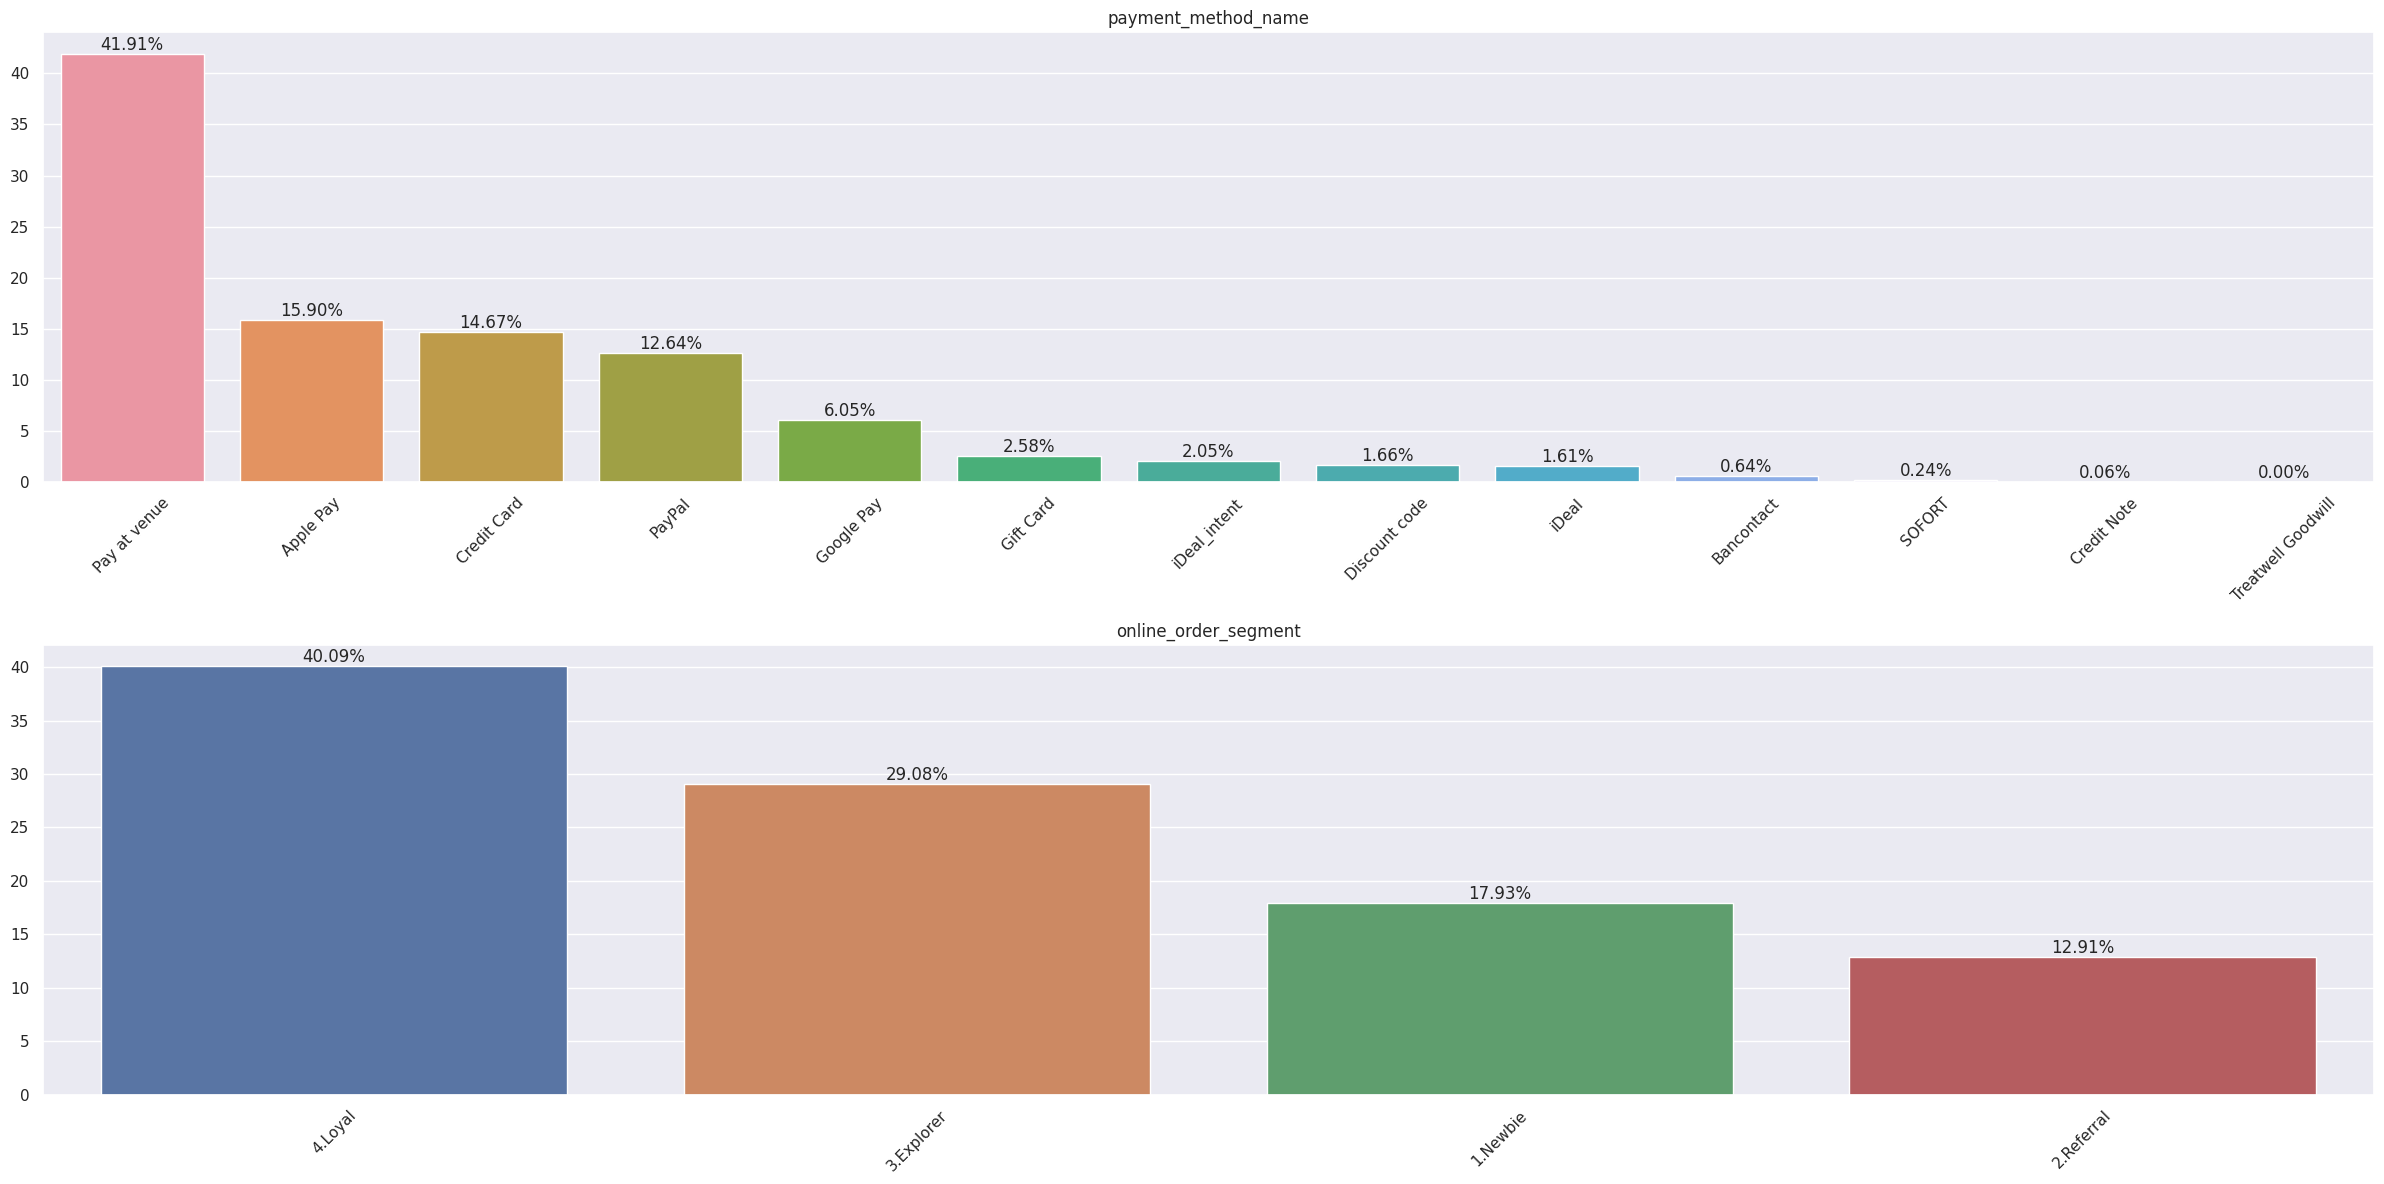

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear el conjunto de figuras
fig, (ax1, ax2) = plt.subplots(2, figsize=(24, 12))

# Crear el gráfico de la variable
content_channel_name = df_orders['payment_method_name'].value_counts(normalize=True) * 100
sns.barplot(x=content_channel_name.index, y=content_channel_name.values, ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax1.set_title("payment_method_name")
# Agregar el porcentaje en la parte superior de cada barra
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x() + p.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom')

# Crear el gráfico de la variable online_order_segment
online_order_segment = df_orders['online_order_segment'].value_counts(normalize=True) * 100
sns.barplot(x=online_order_segment.index, y=online_order_segment.values, ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
ax2.set_title("online_order_segment")
# Agregar el porcentaje en la parte superior de cada barra
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x() + p.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom')

# Mostrar el conjunto de figuras
plt.tight_layout()
plt.show()

In [ ]:
total_count = df_orders['payment_method_name'].count()
payment_method_count = df_orders['payment_method_name'].value_counts()
payment_method_percentage = (payment_method_count / total_count) * 100

In [ ]:
payment_method_percentage

Pay_online      58.087358
Pay_at_venue    41.912642
Name: payment_method_name, dtype: float64

In [ ]:
df_orders.online_order_segment.value_counts()

4.Loyal       2012567
3.Explorer    1459906
1.Newbie       899929
2.Referral     647882
Name: online_order_segment, dtype: int64

In [ ]:
df_orders['online_order_segment'].isnull().sum()

0

In [ ]:
df_orders["unique_venue_id"] = df_orders["unique_venue_id"].astype(str)

In [ ]:
df_orders.dropna(subset=['unique_venue_id'], inplace=True)

In [ ]:
df_orders['payment_method_name'].fillna(0, inplace=True)

In [ ]:
# Crear la variable date_day
df_orders['date_day'] = pd.to_datetime(df_orders[['year', 'month']].assign(day=1))
df_orders['date_day'] = df_orders['date_day'].dt.strftime('%Y-%m-01')

# Eliminar las variables year y month
df_orders = df_orders.drop("year", axis=1)
df_orders = df_orders.drop("month", axis=1)
df_orders.head()

,unique_venue_id,content_channel_name,online_order_segment,payment_method_name,saas_product,gross_orders,gross_item_eur_amount_ttv,gross_aov,gross_revenue_eur,gross_take_rate,cancelled_orders,cancelled_item_eur_amount_ttv,cancelled_aov,cancelled_revenue_eur,cancelled_take_rate,net_orders,date_day
0,120000217,Marketplace,4.Loyal,Pay at venue,tw_pro,4.0,120.00,30.000000,0.00,0.000000,1.0,30.00,30.000000,0.00,0.000000,3.0,2022-11-01
1,110003864,Marketplace,4.Loyal,Pay at venue,tw_connect,561.0,16025.01,28.565080,0.00,0.000000,47.0,1298.00,27.617021,0.00,0.000000,514.0,2022-11-01
2,110003800,Widget,4.Loyal,iDeal_intent,tw_connect,18.0,872.00,48.444444,17.44,0.020000,2.0,113.00,56.500000,2.26,0.020000,16.0,2022-11-01
3,110004004,Marketplace,4.Loyal,PayPal,tw_connect,12.0,622.30,51.858333,12.46,0.020022,1.0,145.95,145.950000,2.92,0.020007,11.0,2022-10-01
4,110003295,Widget,4.Loyal,PayPal,tw_connect,2.0,116.24,58.120000,2.34,0.020131,0.0,0.00,0.000000,0.00,0.000000,2.0,2022-11-01


In [ ]:
df_orders = df_orders[['unique_venue_id', 'online_order_segment', 'date_day', 'net_orders', 'payment_method_name']]

In [ ]:
df_orders

,unique_venue_id,online_order_segment,date_day,net_orders,payment_method_name
0,120000217,4.Loyal,2022-11-01,3.0,Pay at venue
1,110003864,4.Loyal,2022-11-01,514.0,Pay at venue
2,110003800,4.Loyal,2022-11-01,16.0,iDeal_intent
3,110004004,4.Loyal,2022-10-01,11.0,PayPal
4,110003295,4.Loyal,2022-11-01,2.0,PayPal
...,...,...,...,...,...
5021747,110003246,4.Loyal,2022-12-01,1.0,0
5021748,110004094,1.Newbie,2022-03-01,1.0,Pay at venue
5021749,110003926,1.Newbie,2022-10-01,1.0,Pay at venue
5021750,110002316,4.Loyal,2021-07-01,1.0,Credit Card


In [ ]:
import pandas as pd

# Group the data by 'unique_venue_id', 'date_day', and 'online_order_segment' and calculate the sum of 'net_orders'
df_grouped = df_orders.groupby(['unique_venue_id', 'date_day', 'online_order_segment', 'payment_method_name'])['net_orders'].sum().reset_index()

# Group the data again by 'unique_venue_id' and 'date_day' and calculate the sum of 'net_orders' as a new column
df_grouped['total_net_orders'] = df_grouped.groupby(['unique_venue_id', 'date_day'])['net_orders'].transform('sum')

In [ ]:
df_grouped.loc[:,['unique_venue_id','date_day', 'payment_method_name','online_order_segment', 'net_orders']].sample(100)

,unique_venue_id,date_day,payment_method_name,online_order_segment,net_orders
313653,110003253,2022-01-01,Credit Card,3.Explorer,4.0
650022,110004059,2023-02-01,0,4.Loyal,2.0
781309,120000073,2023-02-01,Pay at venue,3.Explorer,5.0
315532,110003256,2021-12-01,Google Pay,4.Loyal,3.0
745039,110004195,2022-01-01,Google Pay,4.Loyal,4.0
...,...,...,...,...,...
35743,110000384,2022-05-01,0,3.Explorer,1.0
785121,120000105,2022-10-01,PayPal,4.Loyal,1.0
312583,110003251,2022-11-01,Pay at venue,4.Loyal,600.0
563567,110003936,2022-01-01,0,3.Explorer,1.0


In [ ]:
# Mapping of payment methods
updated_mapping = {
    'Pay at venue': 'Pay_at_venue',
    'Apple Pay': 'Pay_online',
    'Credit Card': 'Pay_online',
    'PayPal': 'Pay_online',
    'Google Pay': 'Pay_online',
    'Gift Card': 'Pay_online',
    'Discount code': 'Pay_online',
    'iDeal_intent': 'Pay_online',
    'iDeal': 'Pay_online',
    'Bancontact': 'Pay_online',
    'SOFORT': 'Pay_online',
    'Credit Note': 'Pay_online',
    'Treatwell Goodwill': 'Pay_online',
    0: 'Pay_online'
}

# Apply the mapping to the variable payment_method_name
df_grouped['payment_method_name'] = df_grouped['payment_method_name'].map(updated_mapping)

In [ ]:
df_grouped

,unique_venue_id,date_day,online_order_segment,payment_method_name,net_orders,total_net_orders,payment_method_mapped,rate
0,110000000,2021-06-01,1.Newbie,NaN,1.0,35.0,Pay_online,0.029
1,110000000,2021-06-01,1.Newbie,NaN,5.0,35.0,Pay_online,0.143
2,110000000,2021-06-01,1.Newbie,NaN,1.0,35.0,Pay_online,0.029
3,110000000,2021-06-01,1.Newbie,NaN,1.0,35.0,Pay_online,0.029
4,110000000,2021-06-01,1.Newbie,NaN,1.0,35.0,Pay_online,0.029
...,...,...,...,...,...,...,...,...
901518,130264178,2023-05-01,4.Loyal,NaN,1.0,377.0,Pay_online,0.003
901519,130264178,2023-05-01,4.Loyal,NaN,264.0,377.0,Pay_at_venue,0.700
901520,130264178,2023-05-01,4.Loyal,NaN,3.0,377.0,Pay_online,0.008
901521,130264178,2023-05-01,4.Loyal,NaN,8.0,377.0,Pay_online,0.021


In [ ]:
sample_df = df_grouped[df_grouped['unique_venue_id'] == '110002623'].loc[:, ['unique_venue_id', 'date_day', 'online_order_segment', 'net_orders']]

In [ ]:
df_grouped['rate'] = (df_grouped['net_orders'] / df_grouped['total_net_orders']).round(3)

In [ ]:
df_grouped['rate']

0         0.029
1         0.143
2         0.029
3         0.029
4         0.029
          ...  
901518    0.003
901519    0.700
901520    0.008
901521    0.021
901522    0.074
Name: rate, Length: 901523, dtype: float64

In [ ]:
df_grouped.loc[df_grouped["unique_venue_id"] == '110000000']

,unique_venue_id,date_day,online_order_segment,payment_method_name,net_orders,total_net_orders,payment_method_mapped,rate
0,110000000,2021-06-01,1.Newbie,Apple Pay,1.0,35.0,Pay_online,0.029
1,110000000,2021-06-01,1.Newbie,Credit Card,5.0,35.0,Pay_online,0.143
2,110000000,2021-06-01,1.Newbie,Discount code,1.0,35.0,Pay_online,0.029
3,110000000,2021-06-01,1.Newbie,Gift Card,1.0,35.0,Pay_online,0.029
4,110000000,2021-06-01,1.Newbie,Google Pay,1.0,35.0,Pay_online,0.029
5,110000000,2021-06-01,1.Newbie,PayPal,3.0,35.0,Pay_online,0.086
6,110000000,2021-06-01,3.Explorer,Apple Pay,5.0,35.0,Pay_online,0.143
7,110000000,2021-06-01,3.Explorer,Credit Card,12.0,35.0,Pay_online,0.343
8,110000000,2021-06-01,3.Explorer,Discount code,1.0,35.0,Pay_online,0.029
9,110000000,2021-06-01,3.Explorer,Gift Card,1.0,35.0,Pay_online,0.029


In [ ]:
df_grouped['payment_method_name'].value_counts()

Series([], Name: payment_method_name, dtype: int64)

In [ ]:
df_encoded = pd.get_dummies(df_grouped, columns=['online_order_segment', 'payment_method_name'], prefix='', prefix_sep='')

In [ ]:
df_encoded

,unique_venue_id,date_day,net_orders,total_net_orders,payment_method_mapped,rate,1.Newbie,2.Referral,3.Explorer,4.Loyal
0,110000000,2021-06-01,1.0,35.0,Pay_online,0.029,1,0,0,0
1,110000000,2021-06-01,5.0,35.0,Pay_online,0.143,1,0,0,0
2,110000000,2021-06-01,1.0,35.0,Pay_online,0.029,1,0,0,0
3,110000000,2021-06-01,1.0,35.0,Pay_online,0.029,1,0,0,0
4,110000000,2021-06-01,1.0,35.0,Pay_online,0.029,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
901518,130264178,2023-05-01,1.0,377.0,Pay_online,0.003,0,0,0,1
901519,130264178,2023-05-01,264.0,377.0,Pay_at_venue,0.700,0,0,0,1
901520,130264178,2023-05-01,3.0,377.0,Pay_online,0.008,0,0,0,1
901521,130264178,2023-05-01,8.0,377.0,Pay_online,0.021,0,0,0,1


In [ ]:
df_encoded.loc[df_encoded['1.Newbie'] == 1, '1.Newbie'] = df_encoded['rate']
df_encoded.loc[df_encoded['2.Referral'] == 1, '2.Referral'] = df_encoded['rate']
df_encoded.loc[df_encoded['3.Explorer'] == 1, '3.Explorer'] = df_encoded['rate']
df_encoded.loc[df_encoded['4.Loyal'] == 1, '4.Loyal'] = df_encoded['rate']

In [ ]:
df_encoded.loc[df_encoded['Pay_at_venue'] == 1, 'Pay_at_venue'] = df_encoded['rate']
df_encoded.loc[df_encoded['Pay_online'] == 1, 'Pay_online'] = df_encoded['rate']

In [ ]:
df_encoded

,unique_venue_id,date_day,net_orders,total_net_orders,rate,1.Newbie,2.Referral,3.Explorer,4.Loyal,Pay_at_venue,Pay_online
0,110000000,2021-06-01,1.0,35.0,0.029,0.029,0.0,0.0,0.000,0.0,0.029
1,110000000,2021-06-01,5.0,35.0,0.143,0.143,0.0,0.0,0.000,0.0,0.143
2,110000000,2021-06-01,1.0,35.0,0.029,0.029,0.0,0.0,0.000,0.0,0.029
3,110000000,2021-06-01,1.0,35.0,0.029,0.029,0.0,0.0,0.000,0.0,0.029
4,110000000,2021-06-01,1.0,35.0,0.029,0.029,0.0,0.0,0.000,0.0,0.029
...,...,...,...,...,...,...,...,...,...,...,...
864587,130264178,2023-05-01,1.0,377.0,0.003,0.000,0.0,0.0,0.003,0.0,0.003
864588,130264178,2023-05-01,264.0,377.0,0.700,0.000,0.0,0.0,0.700,0.7,0.000
864589,130264178,2023-05-01,3.0,377.0,0.008,0.000,0.0,0.0,0.008,0.0,0.008
864590,130264178,2023-05-01,8.0,377.0,0.021,0.000,0.0,0.0,0.021,0.0,0.021


In [ ]:
df_final = df_encoded.groupby(['unique_venue_id', 'date_day']).sum().reset_index()

In [ ]:
df_final

In [ ]:
df_final.loc[df_final['unique_venue_id']=='110000001']

,unique_venue_id,date_day,net_orders,total_net_orders,rate,1.Newbie,2.Referral,3.Explorer,4.Loyal,Pay_at_venue,Pay_online
4,110000001,2021-06-01,57.0,994.0,0.802,0.169,0.000,0.479,0.154,0.000,0.802
5,110000001,2021-07-01,35.0,429.0,0.899,0.180,0.000,0.539,0.180,0.000,0.899
6,110000001,2021-08-01,52.0,627.0,0.912,0.158,0.000,0.491,0.263,0.000,0.912
7,110000001,2021-09-01,35.0,410.0,0.854,0.171,0.000,0.488,0.195,0.000,0.854
8,110000001,2021-10-01,40.0,540.0,0.889,0.400,0.022,0.356,0.111,0.000,0.889
9,110000001,2021-11-01,29.0,315.0,0.830,0.115,0.000,0.515,0.200,0.000,0.830
10,110000001,2021-12-01,35.0,504.0,0.833,0.190,0.024,0.381,0.238,0.000,0.833
11,110000001,2022-01-01,20.0,225.0,0.800,0.040,0.040,0.560,0.160,0.000,0.800
12,110000001,2022-02-01,28.0,306.0,0.823,0.353,0.000,0.147,0.323,0.000,0.823
13,110000001,2022-03-01,19.0,225.0,0.760,0.120,0.000,0.320,0.320,0.000,0.760


In [ ]:
df_final.drop_duplicates(inplace=True)

In [ ]:
df_final = df_final.rename(columns={
    '1.Newbie': 'Newbie',
    '2.Referral': 'Referral',
    '3.Explorer': 'Explorer',
    '4.Loyal': 'Loyal',
})

In [ ]:
num_rows = len(df_final[df_final['net_orders'] == 0.0])
print("Number of rows where net_orders is 0:", num_rows)

In [ ]:
df_final.drop('rate', axis=1, inplace=True)

In [ ]:
df_final.drop('net_orders', axis=1, inplace=True)
df_final.drop('total_net_orders', axis=1, inplace=True)

In [ ]:
df_final

,unique_venue_id,date_day,Newbie,Referral,Explorer,Loyal,Pay_at_venue,Pay_online
0,110000000,2021-06-01,0.029,0.0,0.000,0.000,0.0,0.029
1,110000000,2021-06-01,0.143,0.0,0.000,0.000,0.0,0.143
5,110000000,2021-06-01,0.086,0.0,0.000,0.000,0.0,0.086
6,110000000,2021-06-01,0.000,0.0,0.143,0.000,0.0,0.143
7,110000000,2021-06-01,0.000,0.0,0.343,0.000,0.0,0.343
...,...,...,...,...,...,...,...,...
864587,130264178,2023-05-01,0.000,0.0,0.000,0.003,0.0,0.003
864588,130264178,2023-05-01,0.000,0.0,0.000,0.700,0.7,0.000
864589,130264178,2023-05-01,0.000,0.0,0.000,0.008,0.0,0.008
864590,130264178,2023-05-01,0.000,0.0,0.000,0.021,0.0,0.021


In [ ]:
df_final.to_csv('orders_arnau.csv', index=False, float_format='%.4f')